<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.910127,63.578108,70.445426,-0.312634,183.621026,184.060230,-0.439204
1,0.0,1.0,75.636775,60.472908,22.221348,0.719383,169.050414,168.570729,0.479685
2,0.0,2.0,27.619695,65.978500,44.392512,-0.131851,147.858856,148.059495,-0.200639
3,0.0,3.0,38.427067,26.120672,24.872172,-0.461677,98.958233,99.422539,-0.464306
4,0.0,4.0,24.334827,99.088509,22.901363,-0.372160,155.952539,156.452079,-0.499540
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.691707,70.905035,62.628426,1.336720,187.561888,186.435774,1.126114
29996,999.0,26.0,43.482131,96.162091,87.269879,1.240369,238.154470,236.804108,1.350362
29997,999.0,27.0,65.096464,82.728530,43.284038,-0.868910,200.240122,201.157080,-0.916958
29998,999.0,28.0,69.536307,87.238286,22.029826,0.927187,189.731605,188.884815,0.846790


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.910127  63.578108  70.445426  ...  183.621026  184.060230 -0.439204
      1.0    75.636775  60.472908  22.221348  ...  169.050414  168.570729  0.479685
      2.0    27.619695  65.978500  44.392512  ...  147.858856  148.059495 -0.200639
      3.0    38.427067  26.120672  24.872172  ...   98.958233   99.422539 -0.464306
      4.0    24.334827  99.088509  22.901363  ...  155.952539  156.452079 -0.499540
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.691707  70.905035  62.628426  ...  187.561888  186.435774  1.126114
      26.0   43.482131  96.162091  87.269879  ...  238.154470  236.804108  1.350362
      27.0   65.096464  82.728530  43.284038  ...  200.240122  201.157080 -0.916958
      28.0   69.536307  87.238286  22.029826  ...  189.731605  188.884815  0.846790
      29.0   48.241818  91.115173  79.218947  ...  227.205551  228.509574 -1.304023

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.910127  63.578108  70.445426  ...  183.621026  184.060230 -0.439204
      1.0    75.636775  60.472908  22.221348  ...  169.050414  168.570729  0.479685
      2.0    27.619695  65.978500  44.392512  ...  147.858856  148.059495 -0.200639
      3.0    38.427067  26.120672  24.872172  ...   98.958233   99.422539 -0.464306
      4.0    24.334827  99.088509  22.901363  ...  155.952539  156.452079 -0.499540
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.691707  70.905035  62.628426  ...  187.561888  186.435774  1.126114
      26.0   43.482131  96.162091  87.269879  ...  238.154470  236.804108  1.350362
      27.0   65.096464  82.728530  43.284038  ...  200.240122  201.157080 -0.916958
      28.0   69.536307  87.238286  22.029826  ...  189.731605  188.884815  0.846790
      29.0   48.241818  91.115173  79.218947  ...  227.205551  228.509574 -1.304023

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.910127,63.578108,70.445426,-0.312634,183.621026,184.060230,-0.439204
1,0.0,1.0,75.636775,60.472908,22.221348,0.719383,169.050414,168.570729,0.479685
2,0.0,2.0,27.619695,65.978500,44.392512,-0.131851,147.858856,148.059495,-0.200639
3,0.0,3.0,38.427067,26.120672,24.872172,-0.461677,98.958233,99.422539,-0.464306
4,0.0,4.0,24.334827,99.088509,22.901363,-0.372160,155.952539,156.452079,-0.499540
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.691707,70.905035,62.628426,1.336720,187.561888,186.435774,1.126114
29996,999.0,26.0,43.482131,96.162091,87.269879,1.240369,238.154470,236.804108,1.350362
29997,999.0,27.0,65.096464,82.728530,43.284038,-0.868910,200.240122,201.157080,-0.916958
29998,999.0,28.0,69.536307,87.238286,22.029826,0.927187,189.731605,188.884815,0.846790


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.910127  63.578108  70.445426  ...  183.621026  184.060230 -0.439204
      1.0    75.636775  60.472908  22.221348  ...  169.050414  168.570729  0.479685
      2.0    27.619695  65.978500  44.392512  ...  147.858856  148.059495 -0.200639
      3.0    38.427067  26.120672  24.872172  ...   98.958233   99.422539 -0.464306
      4.0    24.334827  99.088509  22.901363  ...  155.952539  156.452079 -0.499540
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   42.691707  70.905035  62.628426  ...  187.561888  186.435774  1.126114
      26.0   43.482131  96.162091  87.269879  ...  238.154470  236.804108  1.350362
      27.0   65.096464  82.728530  43.284038  ...  200.240122  201.157080 -0.916958
      28.0   69.536307  87.238286  22.029826  ...  189.731605  188.884815  0.846790
      29.0   48.241818  91.115173  79.218947  ...  227.205551  228.509574 -1.304023

[30000 rows x 7 columns]

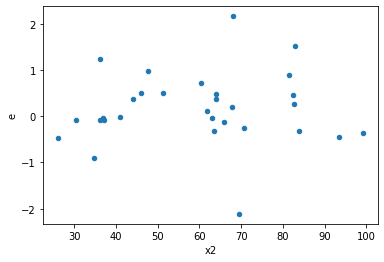

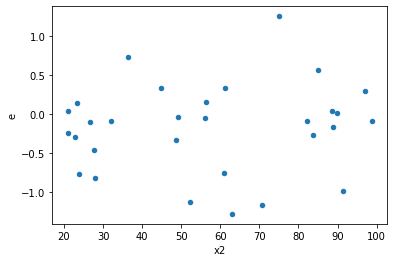

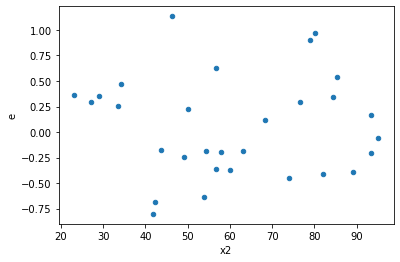

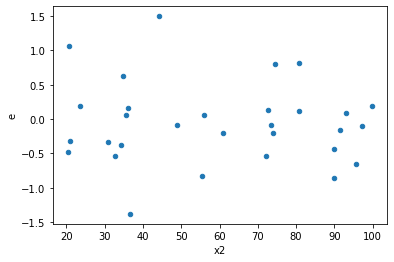

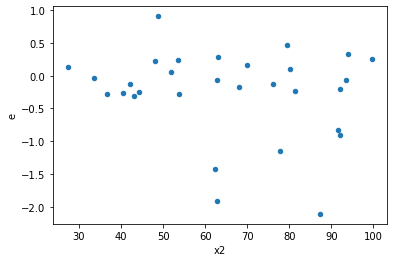

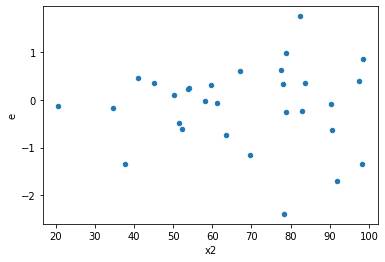

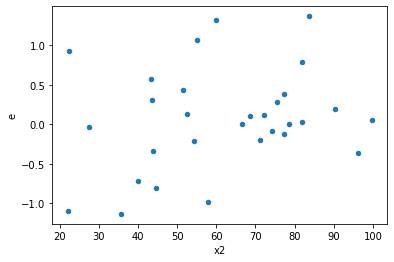

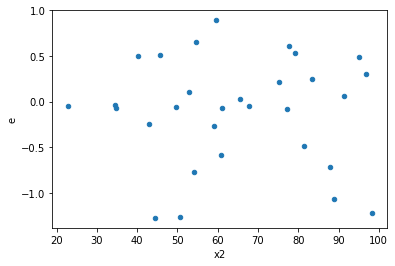

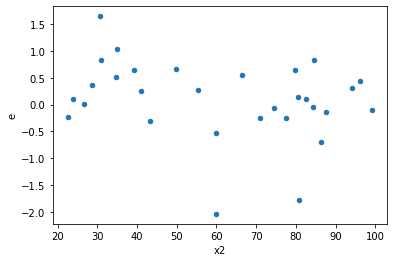

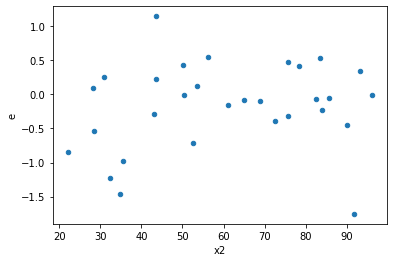

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,13.0,2.826900938943793,11.75968325169079,0.25699099444943574,0.90459101936083,3.519932756004852,0.03450587893030521,0.9827470605348474,0.017252939465152606,Reject001=1 : Homoscedasticity
1.0,8.0,16.0,1.4897161646759898,3.4829723079878523,0.18621452058449872,0.21768576924924077,1.1690053416133106,0.7486891516281176,0.6256554241859412,0.3743445758140588,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,2.176472770276504,6.895855130253188,0.16742098232896183,0.626895920932108,3.744428638582074,0.03499813990397693,0.9825009300480115,0.017499069951988466,Reject001=1 : Homoscedasticity
5.0,7.0,17.0,1.8736698451471443,15.791568192266398,0.26766712073530635,0.9289157760156704,3.47041419754452,0.03405552082861152,0.9829722395856942,0.01702776041430576,Reject001=1 : Homoscedasticity
6.0,8.0,16.0,2.28138874465441,7.444802708963595,0.28517359308180124,0.46530016931022466,1.6316383444969067,0.3848721221691007,0.8075639389154496,0.19243606108455036,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,2.512591382104539,4.917737725089929,0.1794708130074671,0.4917737725089929,2.7401323049031494,0.11450698433552642,0.9427465078322368,0.05725349216776321,Reject001=1 : Homoscedasticity
8.0,10.0,14.0,2.0610029603914546,9.115059824102513,0.20610029603914545,0.6510757017216081,3.1590236124549125,0.04926222840467753,0.9753688857976612,0.024631114202338766,Reject001=1 : Homoscedasticity
9.0,9.0,15.0,2.858573762301799,5.549241410971588,0.3176193069224221,0.3699494273981058,1.1647573662405393,0.7625808579478117,0.6187095710260941,0.38129042897390586,Reject001=1 : Homoscedasticity
10.0,11.0,13.0,3.1314445721718127,4.931470708918431,0.2846767792883466,0.37934390068603313,1.332542477241528,0.6151979138451893,0.6924010430774054,0.30759895692259465,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,13.0,2.826900938943793,11.75968325169079,0.25699099444943574,0.90459101936083,3.519932756004852,0.03450587893030521,Reject001=1 : Homoscedasticity
1.0,8.0,16.0,1.4897161646759898,3.4829723079878523,0.18621452058449872,0.21768576924924077,1.1690053416133106,0.7486891516281176,Reject001=1 : Homoscedasticity
2.0,14.0,10.0,3.877137953419415,2.02307908244503,0.2769384252442439,0.202307908244503,0.7305158468568562,0.574450649063149,Reject001=1 : Homoscedasticity
3.0,12.0,12.0,6.964788869837381,1.6706153395507168,0.5803990724864484,0.13921794496255974,0.23986589841735198,0.01973429821855961,Reject001=1 : Homoscedasticity
4.0,13.0,11.0,2.176472770276504,6.895855130253188,0.16742098232896183,0.626895920932108,3.744428638582074,0.03499813990397693,Reject001=1 : Homoscedasticity
5.0,7.0,17.0,1.8736698451471443,15.791568192266398,0.26766712073530635,0.9289157760156704,3.47041419754452,0.03405552082861152,Reject001=1 : Homoscedasticity
6.0,8.0,16.0,2.28138874465441,7.444802708963595,0.28517359308180124,0.46530016931022466,1.6316383444969067,0.3848721221691007,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,2.512591382104539,4.917737725089929,0.1794708130074671,0.4917737725089929,2.7401323049031494,0.11450698433552642,Reject001=1 : Homoscedasticity
8.0,10.0,14.0,2.0610029603914546,9.115059824102513,0.20610029603914545,0.6510757017216081,3.1590236124549125,0.04926222840467753,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      932
Reject001=0 : Heteroscedasticity     68
Name: Result_test, dtype: int64